In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing()

In [95]:
sp.var('v t, omega, R, phi')
x = sp.Function('x')
y = sp.Function('y')
xp = R * sp.cos(omega * t + phi)
yp = R * sp.sin(omega * t + phi)
R = sp.sqrt((xp - x(t)) ** 2 + (y(t) - yp) ** 2)
vx = v * (xp - x(t)) / R
vy = v * (yp - y(t)) / R
eqs = [sp.Eq(x(t).diff(t),vx), sp.Eq(y(t).diff(t), vy)]
eqs

In [26]:
def derivative(state, t, R = R):
    x, y = state
    r = np.sqrt((y - R * np.sin(omega * t + phi)) ** 2 + (x - R * np.cos(omega * t + phi)) ** 2)
    vx = v * (R * np.cos(omega * t + phi) - x) / r
    vy = v * (R * np.sin(omega * t + phi) - y) / r
    return np.array([vx, vy])

Text(0,0.5,'y[m]')

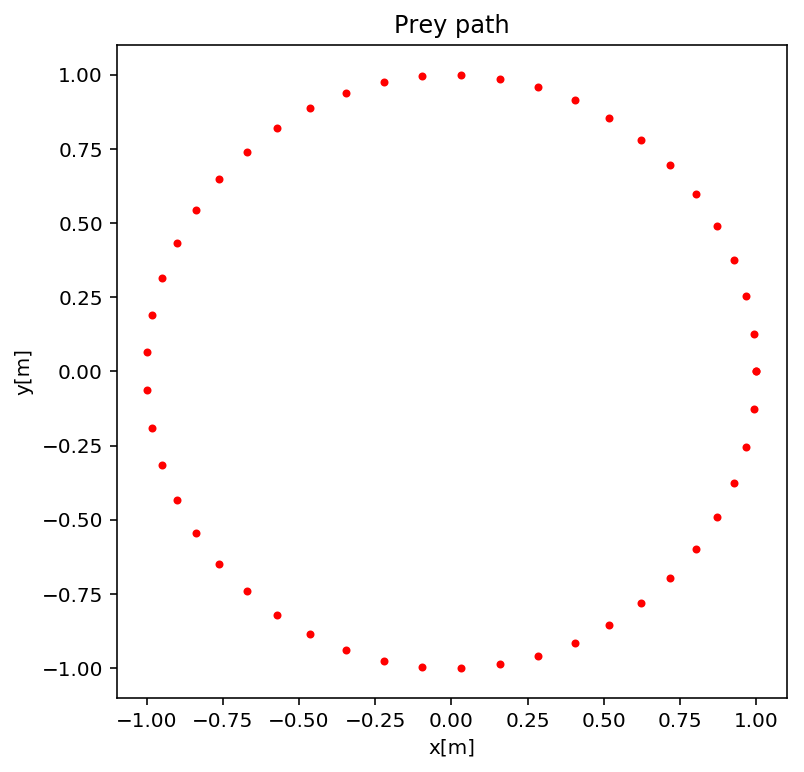

In [27]:
def get_prey_pos(t):
    xp = R * np.cos(omega * t +phi)
    yp = R * np.sin(omega * t + phi)
    return  np.array([xp, yp])
t = np.linspace(0, T)
xp, yp = get_prey_pos(t)
plt.figure(figsize = (6,6))
plt.plot(xp, yp,'r.')
plt.title('Prey path')
plt.xlabel('x[m]')
plt.ylabel('y[m]')

In [82]:
T = 10 #s
omega = 2 * np.pi /T # rad / s
R = 1.0 #m
v = 0.5 * omega * R #m / s
x0, y0 = 2 , 2 #m
phi = np.arctan2(0, -1)

In [83]:
n = 100000
tmax =  5 * T
dt = tmax / (n-1)
t = np.zeros(n)
y = np.zeros((n, 2))
y[0] = x0, y0
for i in range(1, n):
    y[i] =y[i-1] + derivative(y[i - 1], t[i-1]) * dt
    t[i] = t[i-1] + dt
xp, yp = get_prey_pos(t)

Text(0,0.5,'y[m]')

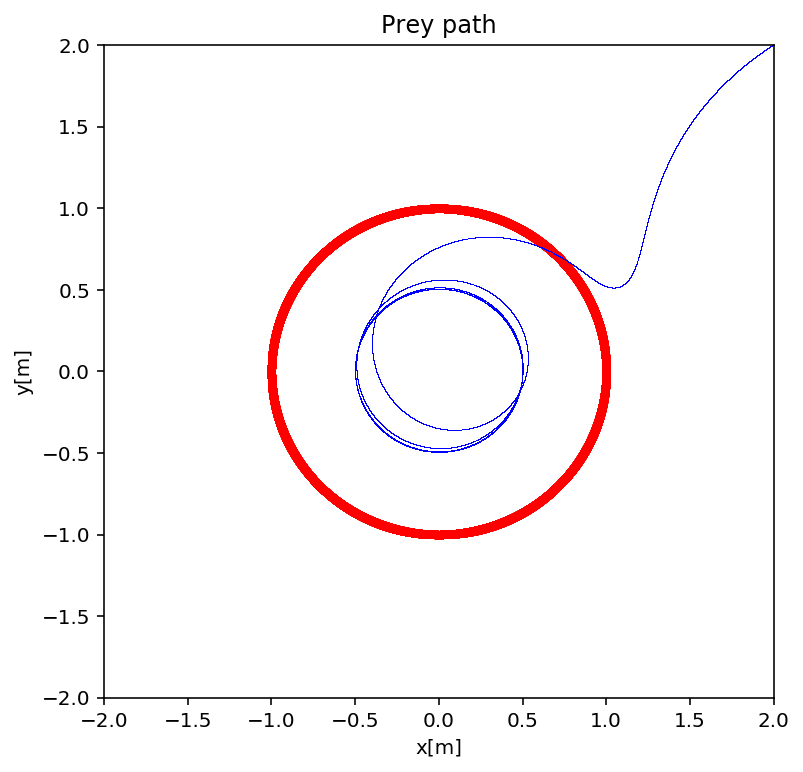

In [84]:
plt.figure(figsize = (6,6))
plt.plot(xp, yp,'r.')
plt.plot(y[:,0],y[:,1],'b,')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Prey path')
plt.xlabel('x[m]')
plt.ylabel('y[m]')


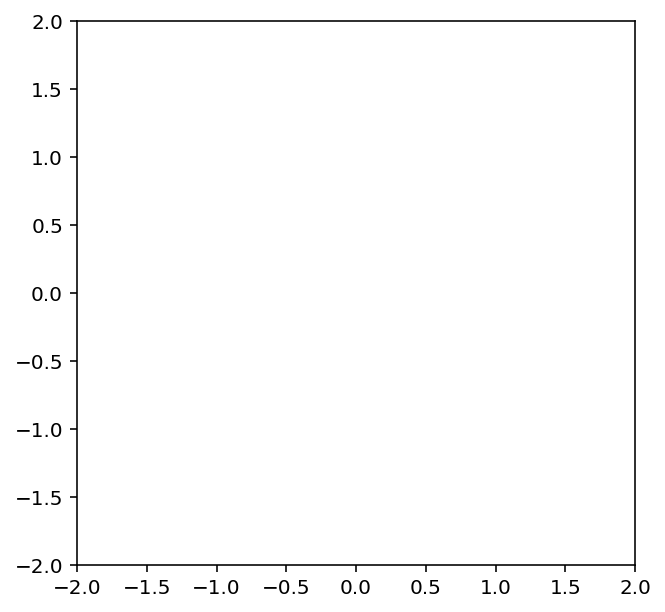

In [85]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_size_inches(5,5)
ln1, = plt.plot([], [],'r,', animated=True)
ln2, = plt.plot([],[],'b.', animated=True)

def init():
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    return ln1, ln2

def update(frame):
    ln2.set_data( xp[:frame], yp[:frame])
    ln1.set_data(y[:frame,0], y[:frame,1])
    return ln2, ln1

ani = FuncAnimation(fig, update, frames=range(0,len(y),1000),
                    init_func=init, blit=True)

In [2]:
from matplotlib import animation, rc
from IPython.display import HTML
HTML(ani.to_html5_video())

NameError: name 'ani' is not defined